In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [37]:
# Load the dataset
ca_data = pd.read_csv('../data/housing.csv')
ca_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Explore the Dataset
Calculate and print the summary statistics for each numerical column in the DataFrame. Include the following:
- count
- mean
- standard deviation
- minimum 
- maximum
- quartile values

In [38]:
ca_data.iloc[:, :-1].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Explore the Variables
Use the `corr()` function to calculate the correlation between variables in the DataFrame
- By default, `corr()` uses teh Pearson correlation to measure the linear correlation between two variables
- Task: Check if the dataset variables are correlated and if tehre are any dubplicate variables

In [39]:
ca_data.iloc[:, :-1].corr

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

# Check for Null Values
To complete this task, perform the following steps:
1. Create a boolean DataFrame to check for NaN values for all features
2. Use the `sum()` function to calculate the count of NaN values for each feature
3. Drop any rows with missing values using the `DataFrame.dropna()` command

In [40]:
ca_data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
ca_data = ca_data.dropna()
ca_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Prepare the Data
To complete this task, perform the following steps:
1. Use the `pd.get_dummies()` method to one-hot encode the categorical columns
2. Write a new line of code that uses the `iloc` function to rearrange the DataFrame
3. Write code that prints the first five rows of the dataset

In [42]:
ca_data = pd.get_dummies(ca_data)
ca_data = ca_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 8]]
ca_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0


# Create the dependent variable
Steps:
1. Write code that creates a dependent variable $y$ from teh column that represents `median_house_value` in the dataset
2. Print the first five values of your new dependent variable

In [43]:
y = ca_data.iloc[:, -1]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

# Create the Independent Variables
Steps:
1. Create your independent variables using the remaining columns in your dataset
2. Print the first five columns using the `head()` function

In [44]:
X = ca_data.iloc[:, :-1]
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


# Split the Data with scikit-learn
Goal: Split the data into two sets, training and testing sets
- The training set is used to train the model
- The testing set is used to evaluate the model's performance before deployment
To complete this task, use the `train_test_split()` method from `sklearn`. This method accepts the following parameters:
- `X`: A DataFrame with independent variables
- `y`: A DataFrame with the dependent variable
- `random_state`: This parameter defines the randomization in the training and testing dataset

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

# Train and Fit the Model
Steps:
1. Add a constant to the `X_train` dataset and give the result a new variable name
2. Create an Ordinary Least Squares (OLS) regression model using the `sm.OLS()` function from teh statsmodels library

In [46]:
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new.astype('float')).fit()

# Run a Summary and Interpret the Findings
To complete this task, use the `summary()` function to generate results from your model

Here are some observations on the generated summary:
- **coef**: shows the regression coefficients and constant term
  - From the values, you can derive the formula `median_house_value` = -1.838e+06 + 100.8903*(`total_bedrooms`)
  - This means each increase in bedrooms is an increase, on average, by 100.8903 in `median_house_value`
  - This formula can be applied to all coefficients, but you will choose one with a contrasting effect on `median_house_value`
  - E.g., in the case of `population` as a coefficient, we get...
    - `median_house_value` = -1.838e+06 * -40.4693(`population`)
    - This means that, on average, an increased `population` decreases the `median_house_value`
- **P(>|t|)**: the p-value associated with the model coefficients
  - E.g., the p-value for `total_rooms` (0.00) is less than 0.05, so there is a statistically significant association between `total_rooms` and `median_house_value`
- **R-squared**: tells us the percentage of the variation in the `median_house_value` that can be explained by your coefficients. For this dataset, 64% of the variation in scores can be explained by coefficients
- **F-statistic and p-value**: The F-statistic (2294) and the corresponding p-value (0.00) indicate the overall significance of the regression model
  - In this example, the p-value is less than 0.05, so you can conclude that your model is statistically significant

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        03:42:47   Log-Likelihood:            -1.9249e+05
No. Observations:               15324   AIC:                         3.850e+05
Df Residuals:                   15311   BIC:                         3.851e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.838e+06   8.57e+04    -21.452      0.000   -2.01e+06   -1.67e+06
longitude                  -2.636e+04   1187.346    -22.205      0.000   -2.87e+04    -2.4e+04
latitude                   -2.515e+04   1169.300    -21.511      0.000   -2.74e+04   -2.29e+04
housing_median_age          1052.8379     51.123     20.594      0.000     952.631    1153.045
total_rooms                   -6.5613      0.926     -7.083      0.000      -8.377      -4.746
total_bedrooms               100.8903      8.100     12.455      0.000      85.013     116.768
population                   -40.4693      1.314    -30.808      0.000     -43.044     -37.895
households                    55.2858      8.839      6.255      0.000      37.960      72.612
median_income               3.917e+04    395.022     99.170      0.000    3.84e+04    3.99e+04
ocean_proximity_<1H OCEAN  -3.868e+05   1.79e+04    -21.552      0.000   -4.22e+05   -3.52e+05
ocean_proximity_INLAND     -4.271e+05   1.68e+04    -25.350      0.000    -4.6e+05   -3.94e+05
ocean_proximity_ISLAND     -2.513e+05   3.39e+04     -7.412      0.000   -3.18e+05   -1.85e+05
ocean_proximity_NEAR BAY   -3.904e+05   1.85e+04    -21.133      0.000   -4.27e+05   -3.54e+05
ocean_proximity_NEAR OCEAN -3.828e+05   1.84e+04    -20.850      0.000   -4.19e+05   -3.47e+05
==============================================================================
Omnibus:                     3533.302   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11513.048
Skew:                           1.164   Prob(JB):                         0.00
Kurtosis:                       6.551   Cond. No.                     2.54e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Plot the Findings
Steps:
1. Plot graph based on teh correlation between `median_house_value` and `median_income`
2. Create a new variable from the `X_test` variable by adding a constant and making the predictions
3. Plot the graph of predicted and actual values
4. Find the mean squared error (MSE)


Text(0.5, 1.0, 'Linear correlation median_income / median_house_value')

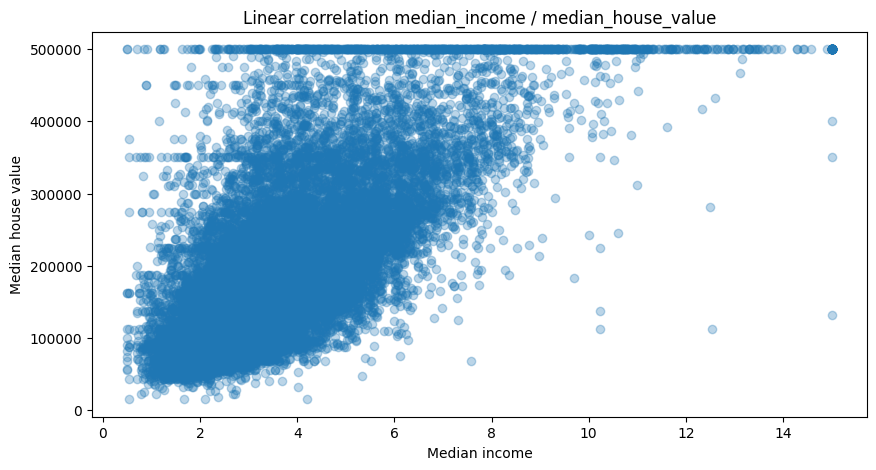

In [48]:
# Step 1: Plot between median_income and median_house_value
plt.figure(figsize=(10,5))
plt.scatter(ca_data["median_income"], ca_data["median_house_value"], alpha=0.3)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Linear correlation median_income / median_house_value')

In [49]:
# Step 2: Create a variable for predictions
X_test_new = sm.add_constant(X_test)
predictions = model.predict(X_test_new)

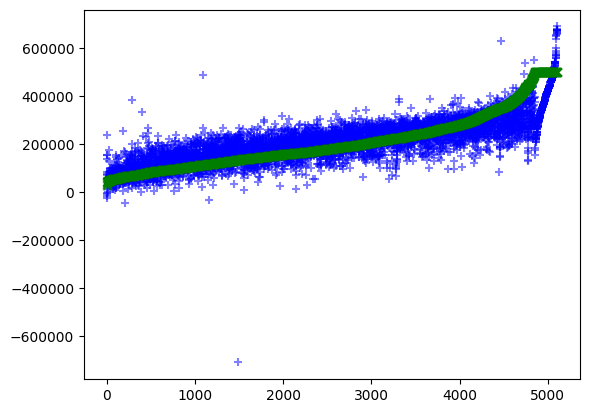

In [50]:
# Step 3: Plot actual vs. predictions
df = pd.DataFrame({"Y_test": y_test, "Y_pred": predictions})
df.sort_values(by=['Y_test', 'Y_pred'], inplace=True, ignore_index=True)
df['idx'] = range(len(df))
plt.scatter(df.idx, df.Y_pred, c="blue", alpha=0.5, marker="+")
plt.scatter(df.idx, df.Y_test, c="green", alpha=0.4, marker="x")
plt.show()


In [51]:
# Step 4: Find MSE
mean_squared_error(y_test, predictions, multioutput='raw_values')

array([4.55087835e+09])